# Data Exploration
This notebook 

## Imports

In [1]:
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
import matplotlib.pyplot as plt

data_dir = "data/processed/"

df_election_totals = pd.read_csv(data_dir + "election_totals.csv")
df_election_totals.set_index("year", inplace=True)

df_registration_voted_totals = pd.read_csv(data_dir + "registration_voted_totals.csv")
df_registration_voted_totals.set_index("year", inplace=True)

df_registration_totals = pd.read_csv(data_dir + "registration_totals.csv")
df_registration_totals.set_index("year", inplace=True)

df_precincts_over_time = pd.read_csv(data_dir + "precincts_with_registration.csv")
df_precincts_over_time.drop("Unnamed: 0", axis=1, inplace=True)

## Assembly District Voting Visualizations

<AxesSubplot:title={'center':'Votes Received by Assembly Candidates'}, xlabel='year'>

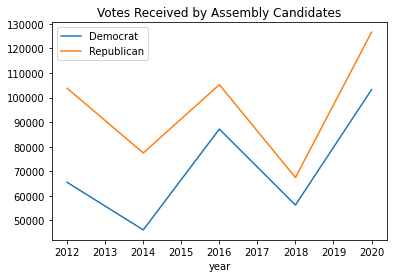

In [2]:
df_election_totals["ASSDEM01"].plot.line(title = "Votes Received by Assembly Candidates", label="Democrat", legend=True)
df_election_totals["ASSREP01"].plot.line(title = "Votes Received by Assembly Candidates", label="Republican", legend=True)


<AxesSubplot:title={'center':'Votes Received by Top Ballot Candidates'}, xlabel='year'>

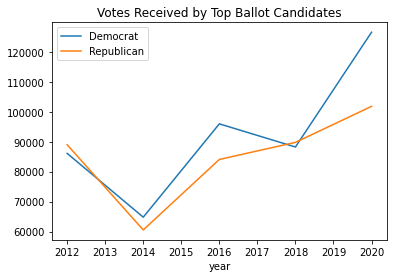

In [3]:
df_election_totals["TOPDEM01"].plot.line(title="Votes Received by Top Ballot Candidates", label="Democrat", legend=True)
df_election_totals["TOPREP01"].plot.line(title="Votes Received by Top Ballot Candidates", label="Republican", legend=True)

In [4]:
df_election_totals["ASSREP01"] - df_election_totals["TOPDEM01"]

year
2012    17671.0
2014    12640.0
2016     9305.0
2018   -20776.0
2020       84.0
dtype: float64

This plot shows what we already suspected: that top ballot Democrats tend to out perform their Republican counterparts. But if we compare the two plots, we discover something pretty surprising: that the Republican State Assembly candidate, with the exception of 2018, outperformed the Democratic **top-ballot** candidate. So in the instance of the recent most race, President Joe Biden received 84 votes **less** than Assemblyman Jordan Cunningham.

There are many possible explanations for this, such as split-ticket voting (which we'll be explore below), third party candidates at the top-ballot level, and the difference in notoriety between the types of elections.

## Registration and Voter Turnout
For the following plots, I opted to include only the three most common voter affiliations: Democrat, Republican, and "Declined to State" 

<AxesSubplot:title={'center':'Votes Cast by Registered Party Affiliation'}, xlabel='year'>

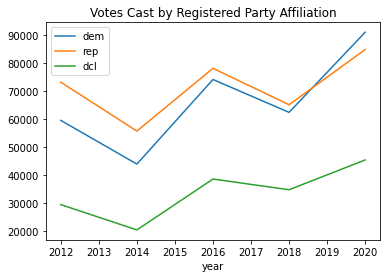

In [5]:
df_registration_voted_totals[["dem","rep","dcl"]].plot.line(title = "Votes Cast by Registered Party Affiliation", label=["Democrat", "Republican", "Declined to State"], legend=True)
# df_registration_voted_totals["dem"].plot.line()

<AxesSubplot:title={'center':'Registration Totals by Party'}, xlabel='year'>

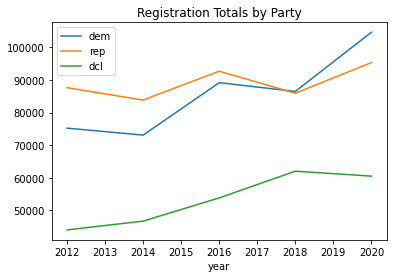

In [6]:
df_registration_totals[["dem","rep", "dcl"]].plot.line(title = "Registration Totals by Party")

<AxesSubplot:title={'center':'Voter turnout by party'}, xlabel='year'>

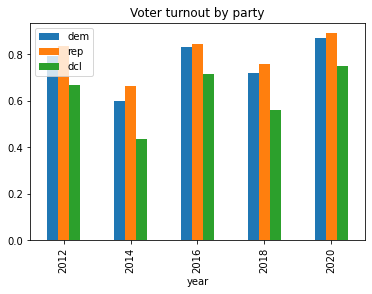

In [7]:
df_perc = df_registration_voted_totals / df_registration_totals
df_perc[["dem","rep", "dcl"]].plot.bar(title="Voter turnout by party")

## Voter Demographics

      chirep  filrep  hisprep  indrep  jewrep  jpnrep  korrep  vietrep
year                                                                  
2012   312.0   844.0   8218.0   183.0  3057.0   347.0   116.0     89.0
2014   287.0   842.0   8148.0   180.0  2926.0   332.0   111.0     80.0
2016   339.0   953.0  10287.0   213.0  3194.0   348.0   126.0     92.0
2018   290.0   866.0   9596.0   201.0  2927.0   309.0   115.0     93.0
2020   359.0  1077.0  12522.0   259.0  3064.0   330.0   154.0    152.0
      chidem  fildem  hispdem  inddem  jewdem  jpndem  kordem  vietdem
year                                                                  
2012   297.0   905.0  17949.0   278.0  2837.0   282.0    60.0     82.0
2014   304.0   861.0  18006.0   291.0  2757.0   268.0    60.0     94.0
2016   483.0  1131.0  24191.0   388.0  3169.0   338.0   103.0    174.0
2018   421.0  1120.0  23568.0   394.0  3112.0   326.0   108.0    165.0
2020   579.0  1431.0  30243.0   488.0  3618.0   377.0   164.0    232.0


<AxesSubplot:title={'center':'Democratic Minority Voting Totals'}, xlabel='year'>

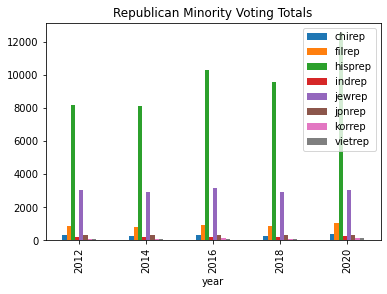

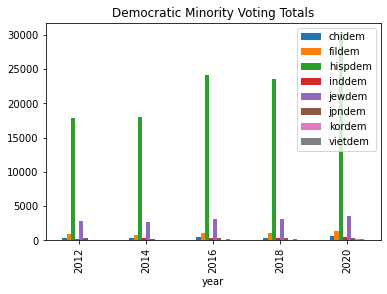

In [8]:
dem_cols = [col for col in df_registration_totals.columns if col.endswith('dem') and len(col) > 3]
rep_cols = [col for col in df_registration_totals.columns if col.endswith('rep') and len(col) > 3]

print(df_registration_totals[rep_cols])
print(df_registration_totals[dem_cols])

df_registration_totals[rep_cols].plot.bar(title="Republican Minority Voting Totals")
df_registration_totals[dem_cols].plot.bar(title="Democratic Minority Voting Totals")

Interestingly, we see approximately the same minority voting trends across either party. However, minority voters tend to align with Democrats by large margins. In the instance of Latino voters, it often tends to be by a 2-1 rate.

<AxesSubplot:title={'center':'Average Republican Turnout vs Registration by Age and Gender Groupings'}>

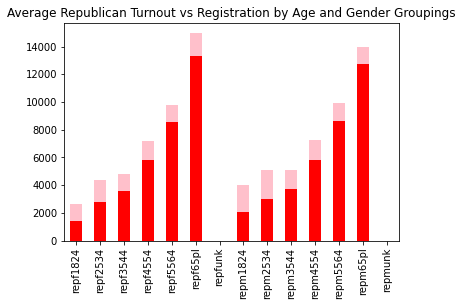

In [9]:
# Get all of the columns relating to party/age/gender group.
dem_cols = [col for col in df_registration_voted_totals.columns if col.startswith('dem') and len(col) > 3]
rep_cols = [col for col in df_registration_voted_totals.columns if col.startswith('rep') and len(col) > 3]

# Plot registration of Republicans who voted, against all registered Republicans.
ax = df_registration_totals[rep_cols].mean().plot.bar(color="pink")
df_registration_voted_totals[rep_cols].mean().plot.bar(ax=ax, color="red", title="Average Republican Turnout vs Registration by Age and Gender Groupings")

<AxesSubplot:title={'center':'Average Democratic Turnout vs Registration by Age and Gender Groupings'}>

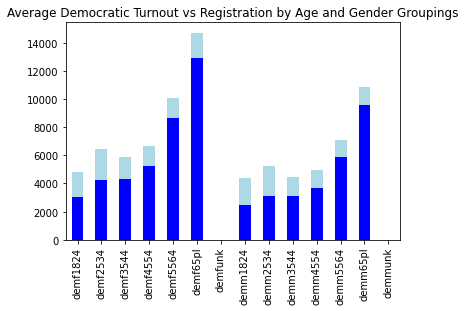

In [10]:
# Plot registration of Democrats who voted, against all registered Democrats.
ax = df_registration_totals[dem_cols].mean().plot.bar(color="lightblue")
df_registration_voted_totals[dem_cols].mean().plot.bar(ax=ax, color="blue", title="Average Democratic Turnout vs Registration by Age and Gender Groupings")

## Observing Precinct Level Voting Trends

The below has each precinct calculate the average share of the vote the Democratic assembly candidate receives.
Additionally, each precinct 

In [11]:
# Make new columns representing the proprotion of votes cast in assembly race for either candidate.
df_precincts_over_time["ASSDEMPERC"] = df_precincts_over_time["ASSDEM01"] / (df_precincts_over_time["ASSREP01"] + df_precincts_over_time["ASSDEM01"])
df_precincts_over_time["ASSREPPERC"] = df_precincts_over_time["ASSREP01"] / (df_precincts_over_time["ASSREP01"] + df_precincts_over_time["ASSDEM01"])

def determine_top_ballot_dem_perc(prec):
    top_race = "GOV" if str(int(prec["year"])) in ["2014", "2018"] else "PRS"
    return prec["{}DEM01".format(top_race)] / (prec["{}DEM01".format(top_race)] + prec["{}REP01".format(top_race)])

# Determine the democrat's performance in the top-ballot race, as it compares to the Republican candidate.
df_precincts_over_time["TOPDEMPERC"] = df_precincts_over_time.apply(determine_top_ballot_dem_perc, axis=1)

# Take the difference in proportions of top dem performance with the assembly candidate.
df_precincts_over_time["DIFFDEMPERC"] = df_precincts_over_time["TOPDEMPERC"] - df_precincts_over_time["ASSDEMPERC"]

# Find the average swing towards the republican assembly candidate, per precinct.
sr_top_dem_perc = df_precincts_over_time.groupby("srprec")["TOPDEMPERC"].mean()



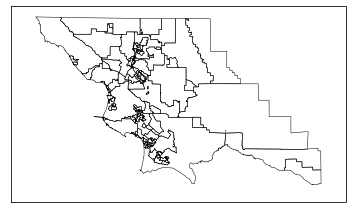

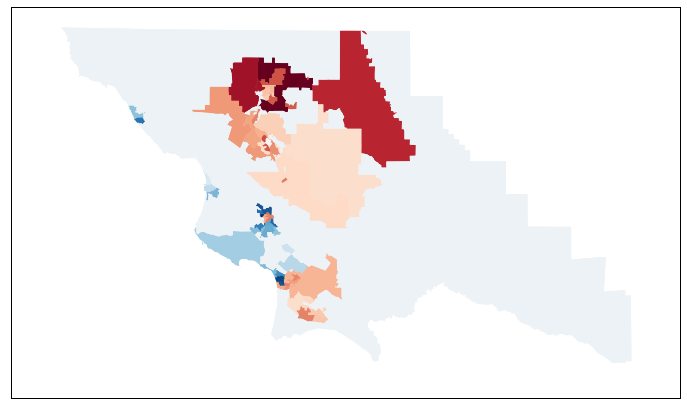

In [12]:
# Import shape file
m = Basemap(width=12000000,height=9000000, llcrnrlon=-121.5, llcrnrlat=34.8, urcrnrlon=-119.3, urcrnrlat=35.85,
            projection="lcc", lat_0=35.3, lon_0=-120.4)
m.readshapefile("data/raw/srprec_079_g20_v01", "precincts")

# Turn each set of vertices into a matplotlib Polygon.
polygons = [mpl.patches.Polygon(vertices) for vertices in m.precincts]

df_map_precincts = pd.DataFrame(m.precincts_info)

df_precincts_avg = df_precincts_over_time.groupby("srprec")["ASSDEMPERC"].mean()
df_precincts_avg = pd.DataFrame(df_precincts_avg)
df_precincts_avg["srprec"] = df_precincts_avg.index
df_precincts_avg.reset_index(drop=True, inplace=True)

# Create a collection of Polygons.
p = mpl.collections.PatchCollection(polygons, cmap="RdBu")
df_precincts_avg["srprec"] = df_precincts_avg["srprec"].astype(str)

df_map_combined = df_map_precincts.merge(df_precincts_avg, how="left", left_on="SRPREC", right_on="srprec")
p.set_array(df_map_combined["ASSDEMPERC"].fillna(0.45))


plt.figure(figsize=(12,8))
m.drawmapboundary()
ax = plt.gca()
ax.add_collection(p)
ax = plt.gca()
ax.add_collection(p)

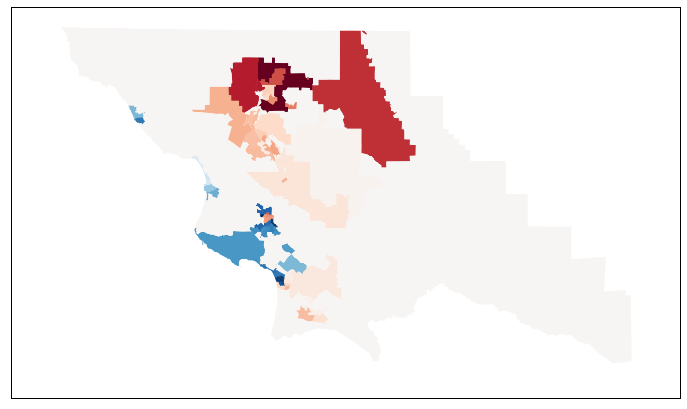

In [13]:
# Turn each set of vertices into a matplotlib Polygon.
polygons = [mpl.patches.Polygon(vertices) for vertices in m.precincts]

df_map_precincts = pd.DataFrame(m.precincts_info)

df_precincts_avg = df_precincts_over_time.groupby("srprec")["TOPDEMPERC"].mean()
df_precincts_avg = pd.DataFrame(df_precincts_avg)
df_precincts_avg["srprec"] = df_precincts_avg.index
df_precincts_avg.reset_index(drop=True, inplace=True)

# Create a collection of Polygons.
p = mpl.collections.PatchCollection(polygons, cmap="RdBu")
df_precincts_avg["srprec"] = df_precincts_avg["srprec"].astype(str)

df_map_combined = df_map_precincts.merge(df_precincts_avg, how="left", left_on="SRPREC", right_on="srprec")
p.set_array(df_map_combined["TOPDEMPERC"].fillna(0.52))

plt.figure(figsize=(12,8))
m.drawmapboundary()
ax = plt.gca()
ax.add_collection(p)
ax = plt.gca()
ax.add_collection(p)

In [14]:
sr_dem_perc = df_precincts_over_time.groupby("srprec")["ASSDEMPERC"].mean()
print((sr_dem_perc.idxmin(), sr_dem_perc.min()), (sr_dem_perc.idxmax(), sr_dem_perc.max()))

(103, 0.23251942830096445) (215, 0.6447330459605246)


It'd appear that on average, the worst precinct for the Democratic candidate has them only carrying 23% of the precinct's vote-share. Meanwhile, the best precinct has the Democratic candidate winning close to 64% of the precinct's votes for the Assembly.

For comparison, we found that the same worst-case precinct has the top-ballot Democrat earning on average ~29% of the vote-share, and that the best precinct was closer to 76%

In [15]:

sr_dem_perc_diff = df_precincts_over_time.groupby("srprec")["DIFFDEMPERC"].mean()
sr_dem_perc_diff.max()

0.17161624031717124

year
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DIFFDEMPERC, dtype: object

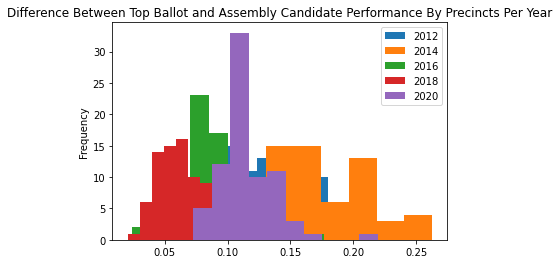

In [16]:
df_precincts_over_time.groupby("year")["DIFFDEMPERC"].plot.hist(legend=True, title="Difference Between Top Ballot and Assembly Candidate Performance By Precincts Per Year")

The above graphic depicts the difference in precints 

In [20]:
# Find the precincts most likely to split their vote between top ballot and assembly vote. 
sr_split_tickets = df_precincts_over_time.groupby("srprec")["DIFFDEMPERC"].mean().sort_values(ascending=False)
split_ticket_ids = sr_split_tickets[:30].index.values

# Get the filtered precincts. 
df_split_ticket_precs = df_precincts_over_time[df_precincts_over_time["srprec"].isin(split_ticket_ids)]

df_split_ticket_precs
df_split_ticket_precs_prop = df_split_ticket_precs

df_split_ticket_precs = df_split_ticket_precs_prop.groupby("srprec")["DIFFDEMPERC"].mean()
df_split_ticket_precs = pd.DataFrame(df_split_ticket_precs)
df_split_ticket_precs["srprec"] = df_split_ticket_precs.index

df_split_ticket_precs.reset_index(drop=True, inplace=True)
df_split_ticket_precs

# Turn each set of vertices into a matplotlib Polygon.
polygons = [mpl.patches.Polygon(vertices) for vertices in m.precincts]
# df_map_combined["DIFFDEMPERC"](10)
p.set_array(df_map_combined["DIFFDEMPERC"].fillna(0.25))


plt.figure(figsize=(12,8))
m.drawmapboundary()
ax = plt.gca()
ax.add_collection(p)


KeyError: 'DIFFDEMPERC'

In [23]:
# Turn each set of vertices into a matplotlib Polygon.
m = Basemap(width=12000000,height=9000000, llcrnrlon=-121.5, llcrnrlat=34.8, urcrnrlon=-119.3, urcrnrlat=35.85,
            projection="lcc", lat_0=35.3, lon_0=-120.4)
m.readshapefile("data/raw/srprec_079_g20_v01", "precincts")

polygons = [mpl.patches.Polygon(vertices) for vertices in m.precincts]

df_map_precincts = pd.DataFrame(m.precincts_info)

# Create a collection of Polygons.
p = mpl.collections.PatchCollection(polygons, cmap="Reds")
df_split_ticket_precs["srprec"] = df_split_ticket_precs["srprec"].astype(str)
df_split_ticket_precs.reset_index(drop=True, inplace=True)

df_map_combined = df_map_precincts.merge(df_split_ticket_precs, how="left", left_on="SRPREC", right_on="srprec")

df_map_combined["DIFFDEMPERC"] = df_map_combined["DIFFDEMPERC"] * 100
print(df_map_combined)
p.set_array(df_map_combined["DIFFDEMPERC"].fillna(0.25))


plt.figure(figsize=(12,8))
m.drawmapboundary()
ax = plt.gca()
ax.add_collection(p)

TypeError: 'NoneType' object is not subscriptable